In [43]:
# 步驟1:安裝必要的套件
# 這個步驟是為了下載中文字型檔案，讓圖表能夠正確顯示中文。
# 學生可以透過 prompt: 安裝 wget 套件

%pip install wget

In [44]:
# 步驟2: 下載中文字型檔案
# 這個步驟是為了確保我們有一個可以用來顯示中文的字型檔案。
# 學生可以透過 prompt: 下載字型檔案並導入WGET模組
# 必須檢查是否已經下載過字型檔案，避免重複下載
import os
import wget
if not os.path.exists("ChineseFont.ttf"):
    url = 'https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf'
    filename = wget.download(url)
else:
    filename = 'ChineseFont.ttf'

In [45]:
# 步驟3: 導入必要的套件和設定中文字型
# 學生可以透過 prompt: "導入機器學習所需的套件包括 numpy, matplotlib, sklearn 等"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont(filename)
mpl.rcParams['font.family'] = 'ChineseFont'

In [46]:
# 步驟4: 載入鳶尾花資料集並進行簡單的資料分析
# 學生可以透過 prompt: "載入 sklearn 內建的鳶尾花數據集並提取前兩個特徵"
from sklearn.datasets import load_iris

iris = load_iris()

# 只使用前兩個特徵，花萼長度和花萼寬度
X = iris.data[:, :2]

# 查看數據集的形狀
print("特徵矩陣型形狀:", X.shape)

# 目標變數: 鳶尾花的種類(0,1,2)
y = iris.target

# 查看目標變數的形狀
print("目標變數型形狀:", y.shape)


特徵矩陣型形狀: (150, 2)
目標變數型形狀: (150,)


In [47]:
# 步驟5: 分割訓練集和測試集
# 學生可以透過 prompt: "使用 train_test_split 將數據分割為訓練集和測試集，測試集佔20%"
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("訓練集特徵形狀:", X_train.shape)
print("測試集特徵形狀:", X_test.shape)  

訓練集特徵形狀: (120, 2)
測試集特徵形狀: (30, 2)


In [48]:
# 步驟6: 建立KNN分類模型
# 學生可以透過 prompt: "使用 KNeighborsClassifier 建立 KNN 分類模型，鄰居數設為3"
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=6) # 設定 K=6，表示考慮最近的6個鄰居

# 步驟7: 訓練KNN模型
# 學生可以透過 prompt: "使用訓練集數據來訓練 KNN 模型"
knn_model.fit(X_train, y_train)



,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
# 步驟8: 進行預測
# 學生可以透過 prompt: "使用測試集數據來進行預測"
y_pred = knn_model.predict(X_test)
print("測試集預測結果:", y_pred)

測試集預測結果: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 1 1 1 2 0 1 0 2 2 1 1 2 0 0]


In [50]:
# 步驟9: 評估模型性能
# 學生可以透過 prompt: "使用 accuracy_score 評估模型的準確率並顯示結果"
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確率: {accuracy*100:.2f}%")


模型準確率: 83.33%


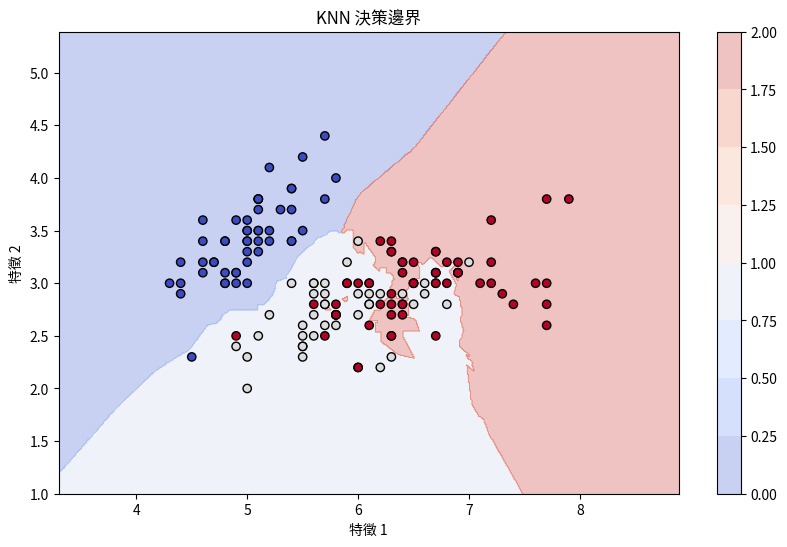

In [51]:
# 步驟10: 可視化決策邊界
# 學生可以透過 prompt: "繪製 KNN 模型的決策邊界和數據點散佈圖"
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01)) 

# 對網格點進行預測
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.colorbar()

# 繪製決策邊界和數據點
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("KNN 決策邊界")
plt.xlabel("特徵 1")
plt.ylabel("特徵 2")
plt.show()

In [53]:
## 步驟11: 儲存模型
# 學生可以透過 prompt: "使用 joblib 將訓練好的模型儲存到本地檔案"
import joblib

# 模型必須要儲存在**models**資料夾中,請先建立該資料夾
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(knn_model, 'models/knn_iris_model.pkl')

['models/knn_iris_model.pkl']